# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('/content/BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

 <font color=purple> **H0: There is no significant relationship between the levels of masculinity in male characters and fanfiction success when controlling for publication year and lexical richness.**

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. An example of this is the Bem

1.   List item
2.   List item

Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


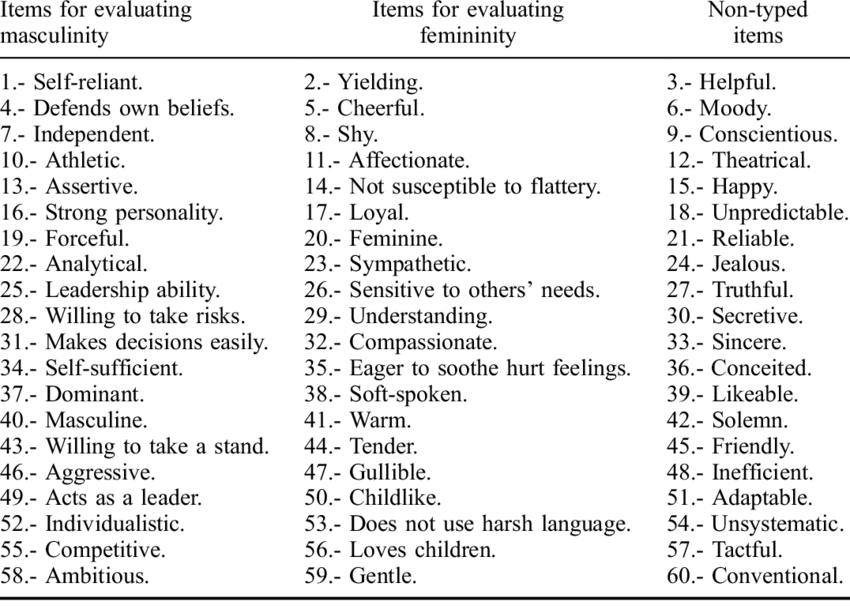

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
colab_directory_path = '/content/gdrive/MyDrive/AD_Assignment_2'

In [7]:
%mkdir /content/gdrive/MyDrive/AD_Assignment_2

mkdir: cannot create directory ‘/content/gdrive/MyDrive/AD_Assignment_2’: File exists


In [8]:
%cd /content/gdrive/MyDrive/AD_Assignment_2

/content/gdrive/MyDrive/AD_Assignment_2


In [9]:
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [10]:
%ls

AD_A2_Masculine_Power.pkl  AD_A2.pkl  df.csv  riveter-nlp/


In [11]:
%cd /content/gdrive/MyDrive/AD_Assignment_2/riveter-nlp/riveter

/content/gdrive/MyDrive/AD_Assignment_2/riveter-nlp/riveter


In [12]:
# Install necessary packages
!pip install -U spacy_experimental
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf
!python -m spacy download en_core_web_sm
!pip install seaborn
!pip install spacy-transformers
!pip install --upgrade spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

Now we have prepared all the dependencies needed.

In [13]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_coreference_web_trf' (3.4.0a0) was trained with spaCy v3.3.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [57]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

In [58]:
# Apply the function above to the story_content stored in our Data Frame

# Apply the function to each element in our Pandas Series and store in column 'story_segments'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['story_segments'] = df['story_content'].apply(split_text_into_segments, max_length=512)

# Turn the list 'segments' into a string within the 'story_content' Data Frame for further processing
df['story_segments'] = df['story_segments'].apply(' '.join)

# Show a few lines of the updated column

df.head()

,story_id,published_year,words,kudos,comments,story_content,story_segments,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,library snacks & 3AM promises Author's Note: I...,0.094243,0.428571
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,"Worry You stumbled through the apartment door,...",0.298780,0.400665
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,Mornings This is literally trash omg what I am...,0.608254,0.428986
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,Purple Gel Pens Author's Note: wtf is this idk...,0.120461,0.412295
4,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...","Unspoken Words You come back into the flat, it...",0.204495,0.376110


Let's first initialize Riveter with the lexicon that we are going to use:





In [ ]:
# Q0 (code): Load lexicon 'power'
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(df['story_segments'],
              df['story_id'],
              num_bootstraps=10)

# Create empty dictionary called 'scores_dict'
scores_dict = {}

100%|██████████| 90/90 [1:00:09<00:00, 40.11s/it]

2024-03-11 14:27:59 Complete!


In [ ]:
# Save this trained model locally in case the connection breaks and then you lose the result.
# https://github.com/maartensap/riveter-nlp/blob/main/riveter/demo.ipynb
riveter.save('/content/gdrive/MyDrive/AD_Assignment_2/AD_A2.pkl')

Riveter successfully saved to "/content/gdrive/MyDrive/AD_Assignment_2/AD_A2.pkl"


In [16]:
# Load the Riveter model using pickle
import pickle

# Specify the path to the saved Riveter model file
saved_model_path = '/content/gdrive/MyDrive/AD_Assignment_2/AD_A2.pkl'

with open(saved_model_path, 'rb') as file:
    loaded_riveter = pickle.load(file)

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code

scores_dict = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter = Riveter()
    riveter.load_sap_lexicon('power')
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$',})

    # store the computed shcores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:34<50:29, 34.04s/it]

2024-03-11 23:09:11 Complete!
Story ID: 4706144, Masculine Power Score: 0.09424311567804337



Processing stories:   2%|▏         | 2/90 [01:02<44:46, 30.53s/it]

2024-03-11 23:09:39 Complete!
Story ID: 4752980, Masculine Power Score: 0.2987800140622592



Processing stories:   3%|▎         | 3/90 [01:30<42:35, 29.37s/it]

2024-03-11 23:10:07 Complete!
Story ID: 4621698, Masculine Power Score: 0.6082539682539683



Processing stories:   4%|▍         | 4/90 [01:58<41:18, 28.82s/it]

2024-03-11 23:10:35 Complete!
Story ID: 3651108, Masculine Power Score: 0.12046097683853438



Processing stories:   6%|▌         | 5/90 [02:36<45:30, 32.12s/it]

2024-03-11 23:11:13 Complete!
Story ID: 5282729, Masculine Power Score: 0.20449457770425514



Processing stories:   7%|▋         | 6/90 [03:05<43:41, 31.21s/it]

2024-03-11 23:11:42 Complete!
Story ID: 5533886, Masculine Power Score: -0.009150132275132273



Processing stories:   8%|▊         | 7/90 [03:35<42:34, 30.77s/it]

2024-03-11 23:12:12 Complete!
Story ID: 4547622, Masculine Power Score: 0.03390523911522993



Processing stories:   9%|▉         | 8/90 [04:05<41:45, 30.56s/it]

2024-03-11 23:12:42 Complete!
Story ID: 16177508, Masculine Power Score: 0.20244780048737057



Processing stories:  10%|█         | 9/90 [04:39<42:48, 31.71s/it]

2024-03-11 23:13:17 Complete!
Story ID: 15745185, Masculine Power Score: -0.10143433756842675



 33%|███▎      | 1/3 [00:14<00:28, 14.35s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [05:08<41:11, 30.90s/it]

2024-03-11 23:13:46 Complete!
Story ID: 15654528, Masculine Power Score: 0.22540224779089582



Processing stories:  12%|█▏        | 11/90 [05:44<42:38, 32.39s/it]

2024-03-11 23:14:21 Complete!
Story ID: 7448155, Masculine Power Score: 0.3130609871688515



Processing stories:  13%|█▎        | 12/90 [06:22<44:27, 34.20s/it]

2024-03-11 23:15:00 Complete!
Story ID: 4983847, Masculine Power Score: 0.10900277497943603



Processing stories:  14%|█▍        | 13/90 [06:57<44:10, 34.42s/it]

2024-03-11 23:15:35 Complete!
Story ID: 3313118, Masculine Power Score: -0.21650938735177866



Processing stories:  16%|█▌        | 14/90 [07:26<41:18, 32.61s/it]

2024-03-11 23:16:03 Complete!
Story ID: 3290390, Masculine Power Score: -0.10557794095119848



Processing stories:  17%|█▋        | 15/90 [07:58<40:40, 32.54s/it]

2024-03-11 23:16:35 Complete!
Story ID: 36435301, Masculine Power Score: 0.0515865587847012



Processing stories:  18%|█▊        | 16/90 [08:26<38:15, 31.03s/it]

2024-03-11 23:17:03 Complete!
Story ID: 36575491, Masculine Power Score: 0.2536772099071351



Processing stories:  19%|█▉        | 17/90 [08:55<37:14, 30.60s/it]

2024-03-11 23:17:33 Complete!
Story ID: 35225224, Masculine Power Score: 0.24097873038490042



Processing stories:  20%|██        | 18/90 [09:23<35:41, 29.75s/it]

2024-03-11 23:18:00 Complete!
Story ID: 4594527, Masculine Power Score: 0.10498556998556999



Processing stories:  21%|██        | 19/90 [09:48<33:40, 28.45s/it]

2024-03-11 23:18:26 Complete!
Story ID: 5485625, Masculine Power Score: 0.10681697612732095



Processing stories:  22%|██▏       | 20/90 [10:15<32:31, 27.88s/it]

2024-03-11 23:18:52 Complete!
Story ID: 36408319, Masculine Power Score: 0.1359165716147955



Processing stories:  23%|██▎       | 21/90 [10:47<33:27, 29.09s/it]

2024-03-11 23:19:24 Complete!
Story ID: 35762659, Masculine Power Score: 0.22018066278226422



Processing stories:  24%|██▍       | 22/90 [11:19<33:52, 29.90s/it]

2024-03-11 23:19:56 Complete!
Story ID: 35603194, Masculine Power Score: 0.3681814689981659



Processing stories:  26%|██▌       | 23/90 [11:48<33:10, 29.71s/it]

2024-03-11 23:20:25 Complete!
Story ID: 35344306, Masculine Power Score: 0.12799597417640723



Processing stories:  27%|██▋       | 24/90 [12:12<30:44, 27.95s/it]

2024-03-11 23:20:49 Complete!
Story ID: 36695155, Masculine Power Score: 0.1388888888888889



Processing stories:  28%|██▊       | 25/90 [12:41<30:49, 28.45s/it]

2024-03-11 23:21:19 Complete!
Story ID: 36064474, Masculine Power Score: 0.09411536808634972



Processing stories:  29%|██▉       | 26/90 [13:11<30:34, 28.66s/it]

2024-03-11 23:21:48 Complete!
Story ID: 36024820, Masculine Power Score: 0.13798988465483314



Processing stories:  30%|███       | 27/90 [13:45<31:49, 30.31s/it]

2024-03-11 23:22:22 Complete!
Story ID: 35182330, Masculine Power Score: 0.041827247767356655



Processing stories:  31%|███       | 28/90 [14:21<33:10, 32.11s/it]

2024-03-11 23:22:58 Complete!
Story ID: 36567496, Masculine Power Score: 0.20804139415883133



Processing stories:  32%|███▏      | 29/90 [14:52<32:10, 31.65s/it]

2024-03-11 23:23:29 Complete!
Story ID: 35560330, Masculine Power Score: 0.14507489819328498



Processing stories:  33%|███▎      | 30/90 [15:23<31:37, 31.63s/it]

2024-03-11 23:24:01 Complete!
Story ID: 35877496, Masculine Power Score: 0.1335341220874951



Processing stories:  34%|███▍      | 31/90 [15:52<30:24, 30.92s/it]

2024-03-11 23:24:30 Complete!
Story ID: 35957410, Masculine Power Score: 0.28898470760089257



Processing stories:  36%|███▌      | 32/90 [16:22<29:27, 30.47s/it]

2024-03-11 23:24:59 Complete!
Story ID: 30947654, Masculine Power Score: 0.057955319332814795



Processing stories:  37%|███▋      | 33/90 [16:51<28:35, 30.10s/it]

2024-03-11 23:25:28 Complete!
Story ID: 36332707, Masculine Power Score: -0.0901478500373725



Processing stories:  38%|███▊      | 34/90 [17:24<28:44, 30.79s/it]

2024-03-11 23:26:01 Complete!
Story ID: 35967940, Masculine Power Score: 0.17757176701587168



Processing stories:  39%|███▉      | 35/90 [17:54<28:01, 30.58s/it]

2024-03-11 23:26:31 Complete!
Story ID: 35001073, Masculine Power Score: 0.138981018981019



Processing stories:  40%|████      | 36/90 [18:26<27:52, 30.98s/it]

2024-03-11 23:27:03 Complete!
Story ID: 35138911, Masculine Power Score: 0.14223136003286035



Processing stories:  41%|████      | 37/90 [18:52<26:10, 29.64s/it]

2024-03-11 23:27:29 Complete!
Story ID: 35280397, Masculine Power Score: 0.2065181419457735



Processing stories:  42%|████▏     | 38/90 [19:25<26:31, 30.60s/it]

2024-03-11 23:28:02 Complete!
Story ID: 36049939, Masculine Power Score: 0.2844405450914362



Processing stories:  43%|████▎     | 39/90 [19:57<26:26, 31.11s/it]

2024-03-11 23:28:35 Complete!
Story ID: 34995673, Masculine Power Score: 0.15932741805987044



Processing stories:  44%|████▍     | 40/90 [20:31<26:38, 31.97s/it]

2024-03-11 23:29:08 Complete!
Story ID: 33477346, Masculine Power Score: 0.4343475764431647



Processing stories:  46%|████▌     | 41/90 [21:00<25:21, 31.04s/it]

2024-03-11 23:29:37 Complete!
Story ID: 36840832, Masculine Power Score: -0.19174017502964874



Processing stories:  47%|████▋     | 42/90 [21:25<23:22, 29.22s/it]

2024-03-11 23:30:02 Complete!
Story ID: 30896276, Masculine Power Score: 0.13178571428571428



Processing stories:  48%|████▊     | 43/90 [21:51<22:04, 28.19s/it]

2024-03-11 23:30:28 Complete!
Story ID: 37363471, Masculine Power Score: 0.44640692640692636



Processing stories:  49%|████▉     | 44/90 [22:18<21:21, 27.85s/it]

2024-03-11 23:30:55 Complete!
Story ID: 36984901, Masculine Power Score: 0.0761515317983214



Processing stories:  50%|█████     | 45/90 [22:45<20:47, 27.72s/it]

2024-03-11 23:31:23 Complete!
Story ID: 33353644, Masculine Power Score: 0.0015509324194118823



Processing stories:  51%|█████     | 46/90 [23:13<20:15, 27.64s/it]

2024-03-11 23:31:50 Complete!
Story ID: 37002835, Masculine Power Score: -0.13839872116187907



Processing stories:  52%|█████▏    | 47/90 [23:41<19:56, 27.82s/it]

2024-03-11 23:32:18 Complete!
Story ID: 5630824, Masculine Power Score: 0.3130193905817174



Processing stories:  53%|█████▎    | 48/90 [24:11<19:58, 28.54s/it]

2024-03-11 23:32:49 Complete!
Story ID: 10053617, Masculine Power Score: 0.22150060583634432



Processing stories:  54%|█████▍    | 49/90 [24:39<19:19, 28.29s/it]

2024-03-11 23:33:16 Complete!
Story ID: 1572659, Masculine Power Score: 0.23738422117098584



Processing stories:  56%|█████▌    | 50/90 [25:09<19:19, 28.98s/it]

2024-03-11 23:33:47 Complete!
Story ID: 7450573, Masculine Power Score: 0.4948235974551764



Processing stories:  57%|█████▋    | 51/90 [25:40<19:03, 29.31s/it]

2024-03-11 23:34:17 Complete!
Story ID: 6918676, Masculine Power Score: 0.005271645019175881



Processing stories:  58%|█████▊    | 52/90 [26:14<19:33, 30.89s/it]

2024-03-11 23:34:51 Complete!
Story ID: 6075402, Masculine Power Score: 0.3593711693470535



Processing stories:  59%|█████▉    | 53/90 [26:47<19:25, 31.51s/it]

2024-03-11 23:35:24 Complete!
Story ID: 11101779, Masculine Power Score: 0.33098129940235205



Processing stories:  60%|██████    | 54/90 [27:19<19:01, 31.70s/it]

2024-03-11 23:35:57 Complete!
Story ID: 11321331, Masculine Power Score: 0.12456385126830052



Processing stories:  61%|██████    | 55/90 [27:47<17:46, 30.46s/it]

2024-03-11 23:36:24 Complete!
Story ID: 12284853, Masculine Power Score: 0.02618918928247237



Processing stories:  62%|██████▏   | 56/90 [28:16<17:04, 30.14s/it]

2024-03-11 23:36:54 Complete!
Story ID: 12282003, Masculine Power Score: 0.10636122057057644



Processing stories:  63%|██████▎   | 57/90 [28:43<15:57, 29.01s/it]

2024-03-11 23:37:20 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [29:09<15:05, 28.30s/it]

2024-03-11 23:37:47 Complete!
Story ID: 4228053, Masculine Power Score: 0.21265987520940918



Processing stories:  66%|██████▌   | 59/90 [29:39<14:53, 28.83s/it]

2024-03-11 23:38:17 Complete!
Story ID: 12127317, Masculine Power Score: 0.12193855850981236



Processing stories:  67%|██████▋   | 60/90 [30:05<13:57, 27.91s/it]

2024-03-11 23:38:42 Complete!
Story ID: 12010134, Masculine Power Score: 0.13452851496329757



Processing stories:  68%|██████▊   | 61/90 [30:38<14:11, 29.37s/it]

2024-03-11 23:39:15 Complete!
Story ID: 11510919, Masculine Power Score: 0.4266783520667222



Processing stories:  69%|██████▉   | 62/90 [31:08<13:53, 29.75s/it]

2024-03-11 23:39:46 Complete!
Story ID: 8145802, Masculine Power Score: 0.2115031123949996



Processing stories:  70%|███████   | 63/90 [31:37<13:14, 29.44s/it]

2024-03-11 23:40:14 Complete!
Story ID: 6637942, Masculine Power Score: -0.16693089262814448



Processing stories:  71%|███████   | 64/90 [32:05<12:30, 28.88s/it]

2024-03-11 23:40:42 Complete!
Story ID: 7427905, Masculine Power Score: -0.029779632573750214



Processing stories:  72%|███████▏  | 65/90 [32:32<11:52, 28.48s/it]

2024-03-11 23:41:10 Complete!
Story ID: 3893857, Masculine Power Score: 0.1353328038857764



Processing stories:  73%|███████▎  | 66/90 [33:02<11:33, 28.90s/it]

2024-03-11 23:41:39 Complete!
Story ID: 33040258, Masculine Power Score: 0.18956349206349205



Processing stories:  74%|███████▍  | 67/90 [33:33<11:20, 29.59s/it]

2024-03-11 23:42:11 Complete!
Story ID: 33858850, Masculine Power Score: -0.16978358939414828



Processing stories:  76%|███████▌  | 68/90 [34:04<10:55, 29.78s/it]

2024-03-11 23:42:41 Complete!
Story ID: 2775776, Masculine Power Score: 0.2501948051948052



Processing stories:  77%|███████▋  | 69/90 [34:33<10:21, 29.61s/it]

2024-03-11 23:43:10 Complete!
Story ID: 3197963, Masculine Power Score: 0.28145299145299146



Processing stories:  78%|███████▊  | 70/90 [35:01<09:44, 29.25s/it]

2024-03-11 23:43:39 Complete!
Story ID: 12395199, Masculine Power Score: 0.16605050389022513



Processing stories:  79%|███████▉  | 71/90 [35:29<09:07, 28.81s/it]

2024-03-11 23:44:06 Complete!
Story ID: 10934010, Masculine Power Score: 0.24182437932437936



Processing stories:  80%|████████  | 72/90 [36:01<08:55, 29.73s/it]

2024-03-11 23:44:38 Complete!
Story ID: 12301116, Masculine Power Score: -0.013388388437171916



Processing stories:  81%|████████  | 73/90 [36:31<08:25, 29.72s/it]

2024-03-11 23:45:08 Complete!
Story ID: 12706317, Masculine Power Score: -0.14595114672319265



Processing stories:  82%|████████▏ | 74/90 [37:02<08:05, 30.35s/it]

2024-03-11 23:45:40 Complete!
Story ID: 11499468, Masculine Power Score: 0.12016846623792643



Processing stories:  83%|████████▎ | 75/90 [37:29<07:19, 29.28s/it]

2024-03-11 23:46:06 Complete!
Story ID: 12184146, Masculine Power Score: 0.28336548360147684



Processing stories:  84%|████████▍ | 76/90 [37:58<06:47, 29.14s/it]

2024-03-11 23:46:35 Complete!
Story ID: 12201333, Masculine Power Score: 0.1086890784165125



Processing stories:  86%|████████▌ | 77/90 [38:29<06:27, 29.84s/it]

2024-03-11 23:47:07 Complete!
Story ID: 11496030, Masculine Power Score: 0.025682049588696125



Processing stories:  87%|████████▋ | 78/90 [38:59<05:58, 29.85s/it]

2024-03-11 23:47:37 Complete!
Story ID: 11510277, Masculine Power Score: 0.16729383891647773



Processing stories:  88%|████████▊ | 79/90 [39:32<05:37, 30.67s/it]

2024-03-11 23:48:09 Complete!
Story ID: 10772274, Masculine Power Score: 0.3807440220160176



Processing stories:  89%|████████▉ | 80/90 [40:01<05:03, 30.30s/it]

2024-03-11 23:48:39 Complete!
Story ID: 12646050, Masculine Power Score: 0.05256907220203619



Processing stories:  90%|█████████ | 81/90 [40:31<04:30, 30.04s/it]

2024-03-11 23:49:08 Complete!
Story ID: 11161479, Masculine Power Score: -0.02376419786571444



Processing stories:  91%|█████████ | 82/90 [40:59<03:55, 29.48s/it]

2024-03-11 23:49:36 Complete!
Story ID: 12069936, Masculine Power Score: 0.04255485076913648



Processing stories:  92%|█████████▏| 83/90 [41:28<03:26, 29.48s/it]

2024-03-11 23:50:06 Complete!
Story ID: 12285972, Masculine Power Score: 0.39661651641257567



Processing stories:  93%|█████████▎| 84/90 [41:56<02:52, 28.80s/it]

2024-03-11 23:50:33 Complete!
Story ID: 12372702, Masculine Power Score: 0.01573822262512072



Processing stories:  94%|█████████▍| 85/90 [42:27<02:27, 29.42s/it]

2024-03-11 23:51:04 Complete!
Story ID: 12610496, Masculine Power Score: 0.08430972400324226



Processing stories:  96%|█████████▌| 86/90 [42:58<02:00, 30.09s/it]

2024-03-11 23:51:35 Complete!
Story ID: 10970472, Masculine Power Score: 0.0904897186147186



Processing stories:  97%|█████████▋| 87/90 [43:23<01:25, 28.50s/it]

2024-03-11 23:52:00 Complete!
Story ID: 12084552, Masculine Power Score: 0.329097181417126



Processing stories:  98%|█████████▊| 88/90 [43:56<00:59, 29.90s/it]

2024-03-11 23:52:33 Complete!
Story ID: 12727119, Masculine Power Score: 0.005077597384041019



Processing stories:  99%|█████████▉| 89/90 [44:23<00:29, 29.12s/it]

2024-03-11 23:53:01 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [44:51<00:00, 29.91s/it]

2024-03-11 23:53:29 Complete!
Story ID: 10859508, Masculine Power Score: 0.21612119424466406


In [ ]:
# Save this trained model locally in case the connection breaks and then you lose the result.
# https://github.com/maartensap/riveter-nlp/blob/main/riveter/demo.ipynb
riveter.save('/content/gdrive/MyDrive/AD_Assignment_2/AD_A2_Masculine_Power.pkl')

Riveter successfully saved to "/content/gdrive/MyDrive/AD_Assignment_2/AD_A2_Masculine_Power.pkl"


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [62]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,story_segments,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,library snacks & 3AM promises Author's Note: I...,0.094243
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,"Worry You stumbled through the apartment door,...",0.298780
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,Mornings This is literally trash omg what I am...,0.608254
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,Purple Gel Pens Author's Note: wtf is this idk...,0.120461
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...","Unspoken Words You come back into the flat, it...",0.204495


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df = df.to_csv('/content/gdrive/MyDrive/AD_Assignment_2/df.csv', index=False)

In [60]:
# See if our CSV saved correctly by reading it
pd.read_csv('/content/gdrive/MyDrive/AD_Assignment_2/df.csv')

,story_id,published_year,words,kudos,comments,story_content,story_segments,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,library snacks & 3AM promises Author's Note: I...,0.094243
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,"Worry You stumbled through the apartment door,...",0.298780
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,Mornings This is literally trash omg what I am...,0.608254
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,Purple Gel Pens Author's Note: wtf is this idk...,0.120461
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...","Unspoken Words You come back into the flat, it...",0.204495
...,...,...,...,...,...,...,...,...
85,10970472,2017,1090,60.0,6.0,You're my best friend\n\nAuthor's Note:\n\nTra...,You're my best friend Author's Note: Translati...,0.090490
86,12084552,2017,1018,122.0,6.0,The Prince and The Philosopher\n\nAuthor's Not...,The Prince and The Philosopher Author's Note: ...,0.329097
87,12727119,2017,1176,264.0,12.0,worry no more when love leans against the door...,worry no more when love leans against the door...,0.005078
88,11962824,2017,1048,135.0,6.0,Letters to Jungkook\n\nAuthor's Note:\n\nI don...,Letters to Jungkook Author's Note: I don't lik...,0.000000


##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [19]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 594.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=6bb71e044e155a37ddd26cde0f6a5bc69e2b43932faf63ed3fbfee5740e4b470
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [63]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,story_segments,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,library snacks & 3AM promises Author's Note: I...,0.094243,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,"Worry You stumbled through the apartment door,...",0.298780,0.400665
2,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,Mornings This is literally trash omg what I am...,0.608254,0.428986
3,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,Purple Gel Pens Author's Note: wtf is this idk...,0.120461,0.412295
4,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...","Unspoken Words You come back into the flat, it...",0.204495,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'masculine_power_score'}>,
        <Axes: title={'center': 'published_year'}>],
       [<Axes: title={'center': 'words'}>, <Axes: >]], dtype=object)

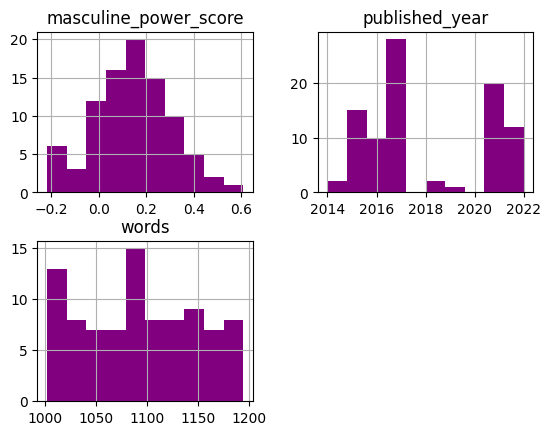

In [64]:
# Q3a (code): Check data distribution
# Use .hist to visualize the histograms for the columns masculine_power_score and lexical_richness. I have chosen the colour purple for consistency in this report.
df[['masculine_power_score', 'published_year', 'words']].hist(color='purple')

In [68]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,133.888889,5.000000,0.141925,0.405027
std,1.307922e+07,2.612177,55.327048,229.121598,6.709041,0.159219,0.037109
min,1.572659e+06,2014.000000,1002.000000,0.000000,0.000000,-0.216509,0.264443
25%,7.448760e+06,2016.000000,1042.250000,19.250000,0.000000,0.042009,0.384458
50%,1.224167e+07,2017.000000,1095.000000,53.000000,3.000000,0.134931,0.410169
75%,3.517148e+07,2021.000000,1141.750000,121.000000,6.750000,0.234389,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.608254,0.491349


In [66]:
# Q3c (code): Check for any missing values
# Check for missing values using df.isnull().sum()
missing_values = df.isnull().sum()

# Show where the missing values are located
missing_values

story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
story_segments            0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [67]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
# Use df.fillna to get rid of our NA values and replace it with 0
# https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
df.fillna(0, inplace=True)

In [43]:
# Rerunning Q3c to again check for any missing values
missing_values = df.isnull().sum()

# If we show the missing values, it should now return 0 for each of the lines
missing_values

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
story_segments           0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

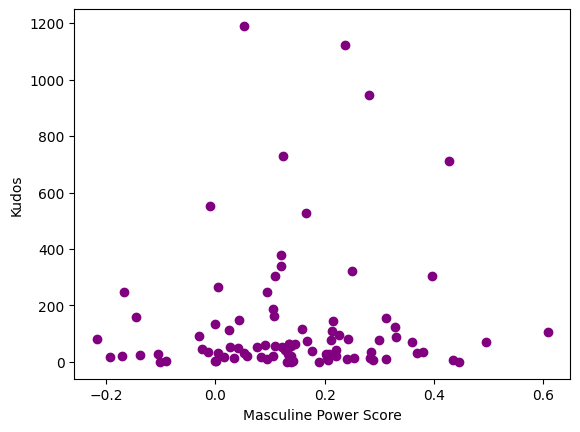

In [69]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
import matplotlib.pyplot as plt

plt.scatter(df['masculine_power_score'], df['kudos'],  c='purple')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.show()

**Q5. Multiple Regression and Analysis**

Multiple Linear Regression: Perform a regression analysis with kudos as the dependent variable and masculine_power_score, published_year, and words as independent variables.

---



In [71]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

# Import all the necessary packages
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Selecting predictors and the target variable (Y = dependent variable, X = independent variables)
# I used 'words' as independent variable because the question asked me too, later the assignment uses 'lexical richness' in the example analysis. I am aware of this, but wanted to place this comment to show you what I chose to do.
X = df[['masculine_power_score', 'published_year', 'words']]
y = df['kudos']

# Fitting the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# For statsmodels, adding a constant to include an intercept in the model
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.663
Date:                Wed, 13 Mar 2024   Prob (F-statistic):            0.00137
Time:                        22:20:33   Log-Likelihood:                -608.17
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.001e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared


 <font color=purple>The R-squared and adjusted R-squared are statistical measures used in regression analysis to assess the goodness of fit of a regression model to the data.

 <font color=purple> The "R-squared is an indicator of how much of the variance in the dependent variables can be explained by variance of the independent variable," and its values range from 0 to 1 and the closer it is to 1, "the closer the actual observation points are to the sample line, indicating a higher goodness of fit" (Analyzing Data, Slides, Week 4). If the value is closer to 0, this indicates that the model does not explain the variance in the dependent variable very well.

 <font color=purple>So, in this case, R-squared is 0.165, which means that approximately 16.5% of the variability in the dependent variable (kudos) is explained by the independent variables in our model. The remaining 83.5% of the variability is not captured.


 <font color=purple> The Adjusted R-squared is a corrected version of the above-explained R-squared value for even more model accuracy. The Adjusted R-squared "penalizes the inclusion of unnecessary variables that do not significantly improve the model". The values of the Adjusted R-squared are similar to the R-squared, so between 0 and 1, and the closer the value is to 1, the better fit of the model. In the result summary provided above, the Adjusted R-squared is 0.136. This adjusted value is slightly lower than the R-squared, suggesting that the model may not be significantly improved by the inclusion of the independent variables.


 <font color=purple>Considering the lower R-squared value, the independent variables in the model explain only a small portion of the variability of the dependent variable. Furthermore, the Adjusted R-squared is slightly smaller, meaning it is similar in meaning to the R-squared.


<font color=purple> A quick note is that I have noticed that the result of the OLS regression differs slightly when drawing from the saved CSV file than when working with the trained Riveter immediately. I had to draw from the CSV to make this assignment workable though.

In [ ]:
# Q6b (words): Interpret F-test result


<font color=purple> An F-test is a statistical test used in regression analysis to assess the overall significance of a regression model. So, as explained in Week 4 of Analyzing Data, the F-test "makes inferences about whether the linear relationship between the dependent and independent variables in the model is statistically significant at the population level" (Slides). Again, the bigger the value, the more sure we are that there is a linear relationship between the independent and dependent variables. If this is the case, we can become more sure if our hypothesis is likely to be true.

  <font color=purple> According to Jim Frost on his website *Statistics by Tim* "if the p-value is less than the significance level, your sample data provide sufficient evidence to conclude that your regression model fits the data better than the model with no independent variables" (https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/). Furthermore, as explained in the lab of week 4, "if the p-value of the F-statistic is small (commonly <0.05), you can reject the null hypothesis that the model with no predictors fits the data as well as your model. This suggests that your model, with at least one predictor, significantly predicts the response variable" (Analyzing Data, Lab, Week 4).

 <font color=purple> In our case, the F-statistic is 5.663, and its associated probability/p-value (Prob (F-statistic)) is 0.00137. This low probability value (lower than the F-statistic and 0.05) indicates that at least one of the independent variables in the model has a significant effect on the dependent variable. Therefore, the model, as a whole, is statistically significant, meaning that our model is a good fit for our data, better than a model without any predictors.

  


  

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

 <font color=purple> We also use the t-test to evaluate the null hypothesis. The OLS regression results return both the coefficient and t-test results. This t-test "assesses [es] the null hypothesis that each coefficient is equal to zero, which would imply that the predictor is not statistically significant in explaining the variation in the response variable" (Analyzing Data, Lab, Week 4).

 <font color=purple> The const is 7.001e+04 is a lot higher than zero, this may imply that there is a statistical significance in explaining a variation in the response variable. This then, may constitute the base number of kudos (when the other variables are all zero).

 <font color=purple> The corresponding p-values indicate this statistical significance. When this value is below 0.05, this signifies a significant relationship between the predictor and response, however, when it is larger than this, this indicates that based on the current sample there might not be a statistical significance between the two variables.

 <font color=purple> The categories (the independent variables; masculine_power, published_year, words) have different results regarding the p-value. Both masculine_power (79.5154) and words (-0.3078) have a higher p-value than 0.05, indicating that these independent variables may not be statistically significant predictors, or numbers, of the dependent variable (kuddos).

 <font color=purple> The independent variable published_year (-34.4629) has a smaller p-value than 0.05, signifying a relationship between published_year and kudos. We can interpret this relationship by evaluating that more recent stories are likely to score fewer kudos.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [72]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from sklearn.linear_model import LinearRegression
from scipy import stats

# Define predictor and response
predictor = df[['masculine_power_score', 'published_year', 'words']]
response = df[['kudos']]

# Instantiate and fit the linear regression model
linreg = LinearRegression()
regression_model = linreg.fit(predictor, response)

# Predicting the kudos based on independent variables as predictor
predictions = regression_model.predict(predictor)

# Calculating residuals
residuals = response - predictions

# Perform Shapiro-Wilk test for kudos
shapiro_test = stats.shapiro(residuals['kudos'])
print('Shapiro-Wilk Test:', shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.6976196765899658, pvalue=2.54363023699522e-12)


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:


 <font color=purple>The Shapiro-Wilk test returns the Shapiro-Wilk score and the p-value. The test is useful for analyzing if our data is normally distributed which is important for further analysis. If the p-value is less than 0.05, we can say that the data tested are not normally distributed. For the results calculated above (statistic=0.6976196765899658, pvalue=2.54363023699522e-12) we can conclude that the p-value is lower than 0.05, which means that our data is not normally distributed.

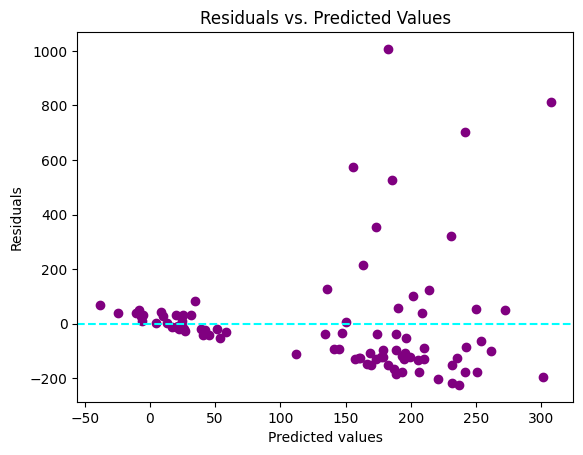

In [73]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
# plotting residuals vs. predictions
plt.scatter(predictions, residuals, c='purple')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='cyan', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:

 <font color=purple>The Homoscedasticity test performed above is visualized in the scatterplot above. The line is put at 0 to easily read our results. We can see that the largest number of the dots are centered around or under this line.

 <font color=purple>The plot above also shows that as the predicted values increase, the spread of the residuals also increases. This indicates heteroscedasticity. This means that the variability of errors in the model does not vary constantly across all the regression line, as would be the case with homoscedasticity.

 <font color=purple> Furthermore, we can say that the relationship is approximately linear. This is because most dots are close to zero, but we should note that there are a lot of outliers in the top-right corner of the plot.

 <font color=purple>These results suggest that while a linear relationship between the residuals and predicted values might suggest that our model captures the underlying linear trend well, the heteroscedasticity suggests that the variability of the residuals is not constant across different levels of the predictor variables. Identifying and addressing heteroscedasticity is essential for ensuring the reliability and validity of regression analysis results.


**Q8: Multicollinearity**

In [76]:
# Q8a (code)
# Checking VIF (Variance Inflation Factor) for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(len(X_sm.columns))]

print(vif_data)

                 feature            VIF
0                  const  605331.668750
1  masculine_power_score       1.002141
2         published_year       1.002140
3                  words       1.000001


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:


 <font color=purple>We can use VIF to measure our multicollinearity. "Multicollinearity occurs when two or more predictor varaibles are hihgly correlated, meaning that one predcitor variable can be linearly predicted from the others with a substantial degree of accuracy" (Analyzing Data, Week 4, Slides). If the VIF score is more than 10, we can conclude a high level of this multicollinearity.

 <font color=purple>In the case of our analysis, the low values (close to 1) for masculine_power, published_year, and words suggest that there is little to no multicollinearity among the predictor variables in our model. This implies that the model's coefficients are likely to be reliable, and the model can be used for predictive or inferential purposes without concerns about multicollinearity-induced biases.

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?


<font color=purple> This research framework aimed to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfiction through several regressional statistics.

<font color=purple> For this research, we used the 'masculine_power_score', 'published_year', and 'words' as independent variables to see their effect on the dependent variable, 'kudos'. We were mainly interested in the impact of masculinity and used publication year and words as extra variables which likely influence the kuddo score.

<font color=purple> Important to note is that the research initially discusses lexical_richness as a third independent variable, which makes more sense to me than words. However, the actual 'assignment questions' asked us to consider 'words,' which is why I ended up using this variable instead. There are always additional variables to consider in future research, such as the popularity of characters in the story, which could also positively influence the kuddo score, as well as the number of readings.

<font color=purple> A more nuanced approach to what the masculinity_score entails is also something future research could consider, as within the context of K-Pop as having gained rather recent success within the Fanfiction community, drawing upon older theories of perceived gender identity and gender roles stereotypically might be a little outdated, or different, to how this works within this corpus.

<font color=purple> For specific analysis of each facet of the regression analysis, you can read the detailed explanation after each individual analysis. However, altogether, the results of our analysis did not provide a very strong support for H1: Low levels of masculinity in male characters positively affect fanfiction success when controlling for publication year and lexical richness. The OLS regression results indicated that the coefficient for the independent variable 'masculine_power_score' was not a statistically significant predictor for the dependent variable 'kudos', suggesting that the level of masculinity in male characters may not have a significant impact on fanfiction success.

<font color=purple> However, when saying this, we should also note the low R-squared value shows that the independent variables that we have decided to build our regression analysis around only explain a small amount of the variability in the success of the K-pop fanfiction in our corpus. So, even though the hypothesis is not supported by our analysis, this could be different if we decide on different independent variables or a different structuring of our model. These are things that could be improved in further research on this topic.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.